In [1]:
import cv2
import numpy as np

In [2]:
!gdown --id 1-7T0uIWCsKCdVRKUUC44i7mnyHxLkDZe
%cp '/content/drive/My Drive/tsai/yolo_v3/yolov3.cfg' .
%cp '/content/drive/My Drive/tsai/yolo_v3/coco.names' .

Downloading...
From: https://drive.google.com/uc?id=1-7T0uIWCsKCdVRKUUC44i7mnyHxLkDZe
To: /content/yolov3.weights
248MB [00:02, 101MB/s]


In [3]:
#Load Yolo
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')
with open('coco.names', 'r') as f:
    classes = [line.strip() for line in f]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [4]:
# Loading Image
img = cv2.imread('IMG_20201026_133507.jpg')
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

In [5]:
# Detetcting objects
blob = cv2.dnn.blobFromImage(img, .00393, (416, 416), (0, 0, 0),
                             True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [6]:
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > .5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle cordinates
            x = int(center_x -w/2)
            y = int(center_y - h/2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [7]:
# Remove duplicate boxes for same label
indexes = cv2.dnn.NMSBoxes(boxes, confidences, .5, .4)

In [8]:
 from google.colab.patches import cv2_imshow

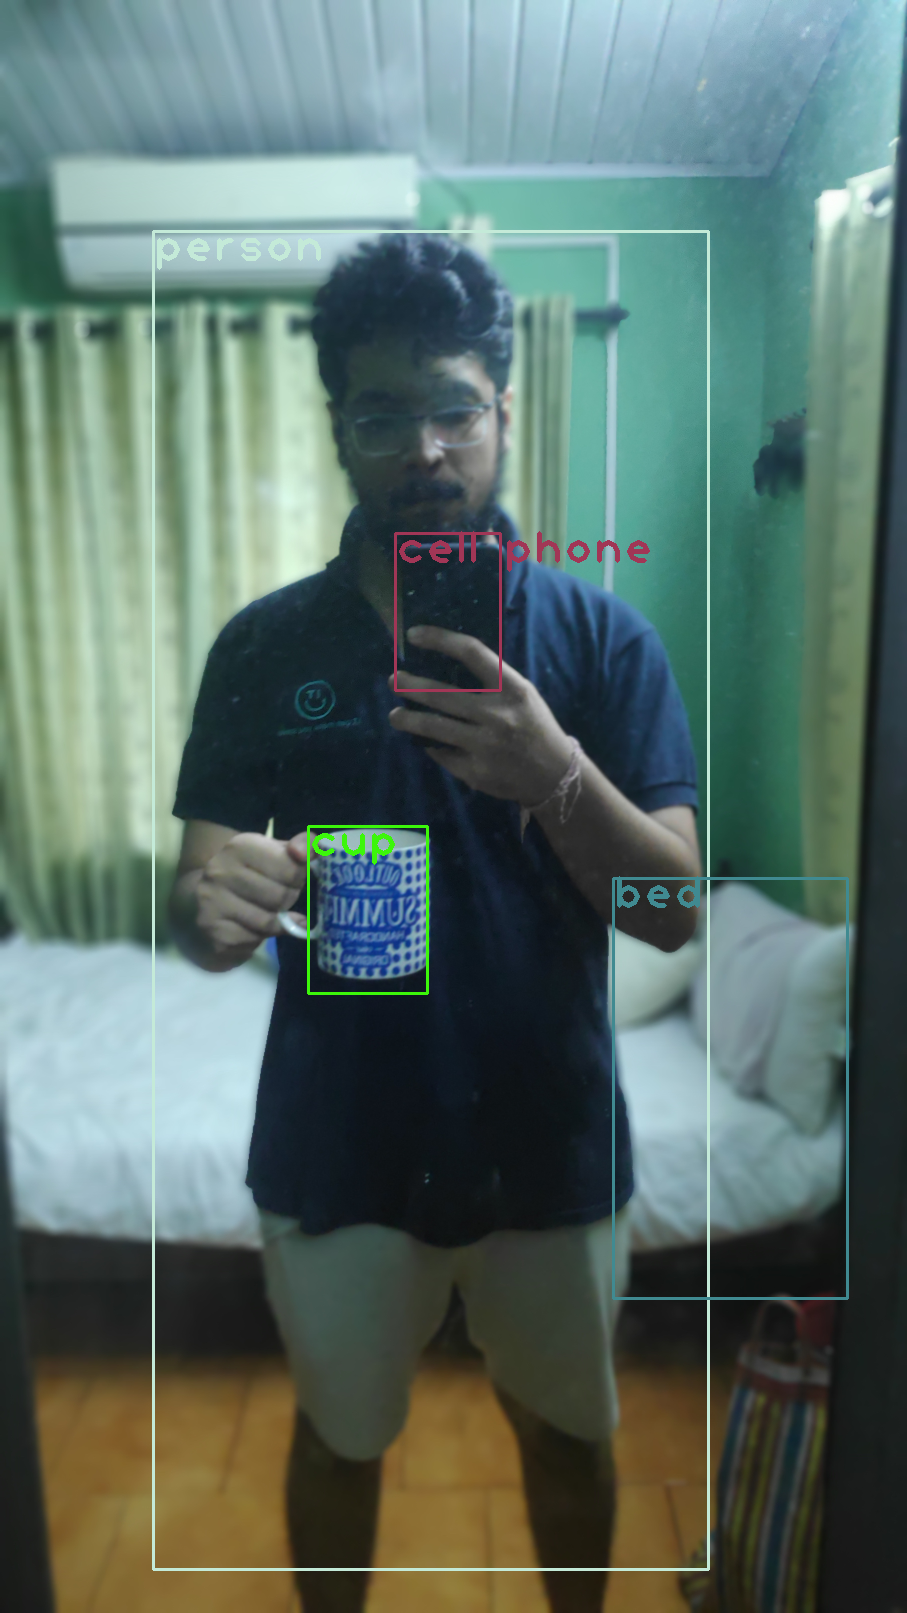

In [9]:
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
        cv2.putText(img, label, (x, y+30), font, 3, color, 3)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()